### Example code for a random forest classification

Welcome back! After introducing the data (see [EDA](/supervised_learning/Exploratory_data_analysis.ipynb)) and applying the [Decision Tree Classifier](/supervised_learning/classification/decision_tree/code/decision_tree_classifier_tutorial.ipynb), we will look at the Random Forest Classifier.

The model:

Random forests are used for classification and regression. This tutorial focuses on classification. As mentioned earlier, your goal is to build a model that predicts whether a car your bosses bought at an auction is a bad buy. Before training the model, let's see what a Random Forest Classifier is.

A random forest classifier is an ensemble method. Ensemble methods combine multiple machine learning models to build a more powerful model. The term random forest comes from combining several decision trees to form a forest. The trees are trained on different subsets of the data set. The final prediction relies on the majority vote of the individual trees.

<img src="../img/random_forest_classifier.svg" alt='Example Random Forest' height="500" width="1000">

Quick reminder: A decision tree predicts the value of a target variable by learning simple decision rules (if/else) inferred from the data features.
The features can be the questions like "Is the vehicle older than five years?" If this case is _True_, the next question to the left, which would be the next feature, follows. The same applies if the car is younger than five years. Then another question, meaning another feature, is considered. The questions are asked until all samples are assigned to a final decision: Buy or Don't Buy. 
For the Random Forest Classifier, this process is repeated for each tree in the forest. The final prediction is the majority vote of the individual trees.

A random forest contains numeral decision trees, each consisting of a root, edges, nodes and leaf nodes:
A root has nodes, a node always has an ancestor and descendants and a leaf has no descendants. Let's have a look again at one decision tree:

<img src="../../../decision_tree/img/decision_tree_classifier.svg" alt="Decision Tree Classifier" height="500" width="1000">

The building process of a decision tree is based on a test performed on the root and each node until a termination condition is reached. 

If we apply this to our data set, we use part of it as a training set to train the data. The training set is recursively split into subsets. Each of these splits represents a node in the decision tree. How exactly the split is done (i.e. which question is asked) depends on the parameters/implementation of the algorithm. 

The termination condition can be:
- the maximum depth of each tree in the forest is reached
- the number of samples in a node is below a certain threshold
- the number of samples in a node is 0
- the node is pure (all samples belong to the same class)

The random forest classifier needs a labeled data set with input features and corresponding class labels. 
The output of a random forest classifier is a class. 

See [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) in the scikit-learn User Guide for more information about the algorithm.


Reference:

Example code for a random forest model by julia from the repo [machine-learning-OER-Basics](https://github.com/Machine-Learning-OER-Collection/Machine-Learning-OER-Basics) is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

We'll start with a basic pipeline which includes the following steps:

## Basic Machine Learning Pipeline

- Load libraries
- Import data set
- Preprocessing
    - Encoding categorical variables
- Split the data set into training and testing sets
- Instantiate the Classifier specifying hyperparameters
- Train the Classifier on the training data
- Evaluate the performance of the Classifier

**The structure of the notebook follows first the basic pipeline. The feature selection topic is covered in a separate step.**

Steps:

1. Preparation of the data set:

    - Transformation:
        - Encode categorical values to numerical (with Pandas)

<br>

2. Training of the data:
    - Split the data into training and testing sets
    - Instantiate the Classifier specifying hyperparameters
    - Train the Classifier on the training data

<br>

3. Evaluate the performance of the Classifier
    - Plot Confusion Matrix
    - Classification report

##### Used libraries in the code:
* [pandas](https://pandas.pydata.org/docs/index.html#) for data analyzing
* [scikit-learn](https://scikit-learn.org/stable/index.html) for machine learning
* [seaborn](https://seaborn.pydata.org/) for statistical data visualization
* [matplotlib](https://matplotlib.org/) for data visualization
* [BalancedRandomForestClassifier](https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html) for sampling the data

From sklearn:

`from sklearn.model_selection import train_test_split`

`from sklearn.tree import RandomForestClassifier`

`from sklearn.metrics import classification_report`

`from sklearn.metrics import confusion_matrix`

`from sklearn.metrics import ConfusionMatrixDisplay`

__________________________________________________


Read in the data set: This tutorial uses the cleaned data set from the EDA.

Check for missing values: This downloaded example data set uses question marks ("?") for missing values. The parameter na_values converts the question marks to the format NaN (not a number), which pandas can detect. By using the data set from the EDA, the missing values are already handled.

In [2]:
import pandas as pd

df = pd.read_csv('../../../../kick_after_EDA.csv')

In [3]:
# Display the data frame
pd.set_option('display.max_columns', None) # if not set, displayed columns will be truncated
df.head(2)

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,CurrentAuctionAveragePrice,CurrentAuctionCleanPrice,CurrentRetailAveragePrice,CurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1260144000,ADESA,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,7451.0,8552.0,11597.0,12409.0,21973,FL,7100.0,0,1113
1,0,1260144000,ADESA,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,7456.0,9222.0,11374.0,12791.0,19638,FL,7600.0,0,1053


# Basic Pipeline

### First step - Transformation

#### Encode the categorical values | Get dummies

As scikit-learn states in the documentation, their Random Forest implementation does not currently support categorical variables. To use both - numerical and categorical features - for the algorithm, the categorical values must be transformed into numeric values.

We encode the categorical attributes in the decision tree notebook with the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn-preprocessing-onehotencoder).

Now we show you another way to encode the categorical values with the [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function from pandas. It is a simple way to encode the categorical values. The function creates a new column for each value and assigns a 1 or 0 to the column. The 1 indicates that the value is present in the row, the 0 indicates that it is not.

Define categorical attributes and write to new data frame.

In [4]:
# Define categorical features

categorical_features = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']

This basically takes only one line of code after you define the categorical columns.

The `pd.get_dummies()` function converts categorical variables into dummy variables. The function returns a new data frame with dummy variables. The original categorical column is dropped from the data frame, and the new dummy variables are added. The new column names are the original column name and the variable name. 

Using the `concat()` method, the encoded data is concatenated with the original data set. The original columns are dropped with the `drop()` method.

In [5]:
encoded_cols = pd.get_dummies(df[categorical_features])

# Concatenate the encoded columns with the numerical columns
df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_cols], axis=1)
print(f'Amount of features after using get_dummies: {df_encoded.shape[1]}')

Amount of features after using get_dummies: 2144


The data set after using the `get_dummies()` method has the same shape as applying the `OneHotEncoder()` method (72464, 2144).

Since some features have many different values, the encoded data set becomes quite large. This raises the question of whether all these 'new' features are needed at all. Let's leave this question for now (you can find [more information here](https://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation)) and look at the basic pipeline for the RandomForestClassifier. 

**Split the target variable (y) from the features (X)**

The [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier) takes X and y as input. The target variable (y) is the variable that should be predicted. The features (X) are the variables used to predict the target variable. 
X and y are numpy arrays or sparse matrices of shape (n_samples, n_features), where n_samples is the number of samples and n_features is the number of features. A numpy array is a grid of values, all of the same type. 

In [6]:
# Split the encoded data frame into X and y
X = df_encoded.drop('IsBadBuy', axis=1) # Drop the target column from the features
y = df_encoded['IsBadBuy']

### Second step - Training of the data

Split the data into training and testing sets

The [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function splits the data set into training and test sets. The test_size parameter specifies the proportion of the test set. You can also split the data set into 25% test and 75% training data by setting the parameter to 0.25. If you use the default parameters, you're all set for the first run, so don't worry.

The random_state parameter ensures that the split is always the same. You can set it to any integer (but always the same). If you don't set this parameter, the split will differ each time you run the code. We'll decide to set the parameter to 42. If you need to know why, a quick search on the web will help. The same goes for questions about the code. Stackoverflow is a suitable place to start.

X_train and y_train are the _training_ sets for the features and the target variable. X_test and y_test are the _test_ sets for the features and the target variable.

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from collections import Counter

print(f'Training set shape {Counter(y_train)}')
print(f'Testing set shape {Counter(y_test)}')

Training set shape Counter({0: 42568, 1: 5982})
Testing set shape Counter({0: 20988, 1: 2926})


**Train the Random Forest Classifier**

See the first results of your model in a moment. 

Let's go through the code line by line:

Instantiate the Classifier specifying parameters: The RandomForestClassifier has many parameters. We'll use almost all of the default parameters for now. You can find more information about the parameters in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier).
Only random_state is set to 42 to ensure our results are reproducible.

Let's dive into the parameters we set:

* The `n_estimators` parameter is set to 100. This parameter indicates the number of trees in the forest. 

* The `criterion` parameter is set to Gini, the default value. The criterion parameter determines the function to measure the quality of a split. Supported criteria are _gini_ for Gini impurity, entropy, and log_loss for information gain. We explain Gini impurity in the [Decision Tree Notebook](/supervised_learning/classification/decision_tree/code/decision_tree_classifier_tutorial.ipynb); for the other criteria, see the [documentation](https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation).

* The parameter `max_depth` is set to 5. The default None would cause the maximum tree to branch out until all leaves are pure or contain less than the value defined for min_samples_split.

* `min_samples_split` is set to the default value of 2 to ensure each node has at least two samples to split.

* We set the `min_samples_leaf` to the default value of 1 to ensure each leaf has at least one sample.

* `min_weight_fraction_leaf` is set to the default value of 0.0. This parameter specifies the minimum weighted fraction of the sum of the weights (of all input samples) a leaf node requires. If sample_weight is not set, samples will have identical weights.

* `max_features` is set to the default value of sqrt. This parameter specifies the number of features to consider when computing the best split. The default value of sqrt means the algorithm uses the square root of the total features. For the other options, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier).

* `max_leaf_nodes` is set to the default value of None. This parameter specifies the maximum number of leaf nodes. The default value of None means that the number of leaf nodes is unlimited.

* The parameter `min_impurity_decrease` defines whether a node should be split based on the impurity reduction the split would cause. The default value of 0.0 means that all nodes are expanded.

* `bootstrap` is set to True. This parameter specifies whether bootstrap samples are used when building trees. If false, the entire data set is used to construct each tree. See the bootstrap [EXCURSION](#excursion-bootstrap) below for more information.

* `oob_score` is set to False. This parameter is used to specify whether or not out-of-bag samples should be used to estimate the accuracy of the generalization. Note, if you set bootstrap to False, oob_score is not available.

* The parameter `n_jobs` is set to None. This parameter is used to specify the number of jobs to run in parallel.

* We set the `random_state` to the integer 42. The random_state parameter impacts randomness in two aspects: First, it controls the random selection of samples during the bootstrapping process when constructing trees (if bootstrap=True). Second, it controls the sampling of the features considered for determining the optimal split at each node (if max_features < n_features).

* We set `verbose` to 0. The verbosity parameter determines the output level generated during the fitting and predicting processes. When set to 0, no messages are printed. Setting it to 1 will print messages at the start of fitting and predicting. If set to 2, messages will be printed for each tree fitted and predicted.

* The parameter `warm_start` is set to False. The parameter controls whether the solution from the previous fit call should be reused, adding more estimators to the existing ensemble, or if a completely new forest should be fitted.

* We leave the `class_weight` to None. The weight of each class is specified by this parameter. If we choose None, the classes are supposed to have weight one. 

* For `ccp_alpha`, we leave the default value of 0.0. The ccp_alpha parameter, also known as the complexity parameter, regulates the pruning of subtrees in decision trees. Pruning is a technique to mitigate [overfitting](../../../k_nearest_neighbors/explainer/overfitting_underfitting.md) by reducing the complexity of the tree. By default, no pruning is applied, allowing the decision tree to grow without any limitations on complexity.

* `max_samples` is set to None. The max_samples parameter determines the number of samples drawn from X to train each base estimator. When bootstrap is set to True (which is the default), max_samples is automatically set to the total number of samples in X. If max_samples exceeds the number of available samples, all samples will be used for training all trees, meaning no sampling will occur.

As mentioned, if you use the default parameters, you don't need to specify them in the RandomForestClassifier().

We import the RandomForestClassifier from sklearn.tree. 

In [9]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier
model = RandomForestClassifier(random_state=42, max_depth=5)

And now, we train the model. The `fit()` method trains the model on the training data X_train and y_train.

In [10]:
# Fit model to training set
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

The method `predict()` predicts the target variable for the test data X_test. The predicted values are assigned to the variable `y_pred`.

In [11]:
# Evaluate the model
from sklearn.metrics import classification_report

# Predictions on the test data by using the trained model
y_pred = model.predict(X_test)

target_names=['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.93     20988
     Class 1       0.00      0.00      0.00      2926

    accuracy                           0.88     23914
   macro avg       0.44      0.50      0.47     23914
weighted avg       0.77      0.88      0.82     23914



**Confusion Matrix**

To understand the [confusion matrix](/Machine-Learning-OER-Basics-main/supervised_learning/classification/k_nearest_neighbors/explainer/confusion_matrix_binary_classification.md), the example with **moon** and **sun**, that was already used in the Decision Tree notebook, comes in helpful. The main diagonal of the confusion matrix shows the number of correct classifications.

Consider the following example: The confusion matrix shows that 1,000 samples were classified as **moon**. Of these, 900 were correctly classified as **moon**, and 100 were incorrectly classified as **sun**. The class sun is classified as moon 400 times and sun 600 times.
. |**Predicted Moon**  | **Predicted Sun** |
---- | ---- | ----
**Actual Moon**  |      900        |     100       |
**Actual Sun**  |      400        |     600       |

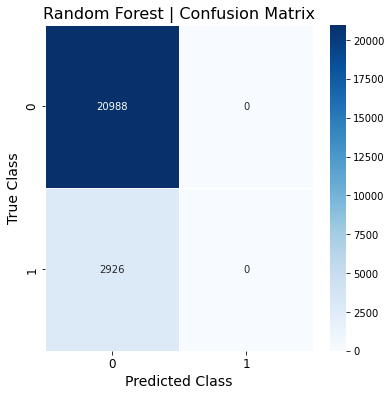

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

rfc_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(rfc_cm, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap='Blues')
plt.title('Random Forest | Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
ax.tick_params(labelsize=12)

plt.show()


The true predictions are on the main diagonal. As you saw in the classification report, the model failed to classify any vehicle as a bad buy. Let's see if we change this by balancing the classifier.

#### Imbalanced data set

The manipulation of [imbalanced data](/Machine-Learning-OER-Basics-main/supervised_learning/images_explainer/explainer/data_sets.md) sets has an impact on the performance of the model. This tutorial uses the [BalancedRandomForestClassifier](https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html) undersampling method.

For different methods, see the [imbalanced-learn](https://imbalanced-learn.org/stable/references/index.html) documentation.

**BalancedRandomForestClassifier**

The BalancedRandomForestClassifier is another ensemble method in which a balanced bootstrap sample is provided to each tree in the forest.

The Balanced Random Forest (BRF) algorithm works like this: 

1. It draws a bootstrap sample from the minority class at each iteration in a random forest. It then randomly draws the same amount of cases from the majority class with replacement. 

2. Causes a classification tree to grow to the maximum size (if no max_depth is set). No pruning is done. Unlike the random forest classifier used above, it does not search through all variables for the optimal split at each node but only through a set of randomly selected variables.

3. It repeats the above two steps as many times as desired. The predictions of the ensemble are aggregated and a final prediction is made.

Let's apply the sampling method to our data set. NOTE: The sampling method should only be applied to the training data set. So we need to split the data set into training and test data set first. We use the same parameter we used for our basic model.

We name the split data set `X_train_brfc, X_test_brfc, y_train_brfc, y_test_brfc` for better distinction.

In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_brfc, X_test_brfc, y_train_brfc, y_test_brfc = train_test_split(X, y, test_size=0.33, random_state=42)

Consider the following parameter:

* The parameter `random_state=42` ensures that the results are reproducible.
* `replacement='True'` specifies to use a bootstrap of the minority class and draws randomly with replacement.
* The maximum depth of the tree is `max_depth=5`, the same setting as used for the base model.
* `sampling_strategy='auto'` resamples all classes except the minority class. This forces bootstrapping of the minority class.

We import the `BalancedRandomForestClassifier()` method from the `imblearn.ensemble` library and assign the method to the variable b_model. 

In [14]:
# from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Create the oversampler object
b_model = BalancedRandomForestClassifier(random_state=42, replacement=True, max_depth=5, sampling_strategy='auto')

Now we call the method `fit()` on the training data set as before.

In [15]:
# Fit the variable to the training data
b_model.fit(X_train_brfc, y_train_brfc)

BalancedRandomForestClassifier(max_depth=5, random_state=42, replacement=True)

#### Evaluation of the performance

In [16]:
# Predictions on the test data by using the trained model
y_pred_brfc = b_model.predict(X_test_brfc)

# Evaluate the classifier's performance
target_names=['Class 0', 'Class 1']
print(classification_report(y_test_brfc, y_pred_brfc, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.92252   0.62464   0.74491     20988
     Class 1    0.18809   0.62372   0.28902      2926

    accuracy                        0.62453     23914
   macro avg    0.55531   0.62418   0.51696     23914
weighted avg    0.83266   0.62453   0.68913     23914



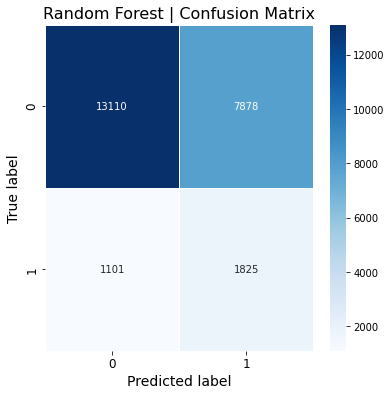

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
b_rfc_cm = confusion_matrix(y_test_brfc, y_pred_brfc)

# Plot confusion matrix
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(b_rfc_cm, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap='Blues')
plt.title('Random Forest | Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
ax.tick_params(labelsize=12)

plt.show()

The model is now able to classify samples for class 1. Still, the model seems to perform well on class 0, achieving high precision, but not as well on class 1, with lower precision and accuracy. This could be due to class imbalance. The model is now better at capturing instances of class 1 (recall is relatively higher), but struggles to correctly classify them (low precision).

This concludes the tutorial for the Random Forest Classifier. Please feel free to apply the sampling method from the decision tree notebook and compare the results.

If you try out different parameters, writing a test plan beforehand is always good to keep track of the different parameters and the corresponding results.

Next up is the [Boosting](/supervised_learning/classification/ensemble_methods/boosting/code/gradient_boosting_classifier_tutorial.ipynb) tutorial.

### EXCURSION: BOOTSTRAP

Bootstrap is used in statistics to measure the uncertainty of an estimate. In the context of random forests, bootstrapping is used to create several training data sets from the original data set. Each training data set is created by sampling from the original data set with replacement. This means that some of the samples will be selected more than once, while other samples will not be selected at all. The unselected samples are called out-of-bag (OOB) samples. OOB samples are used to estimate the model's generalization accuracy. Generalization accuracy is the accuracy of the model on new data.<br>
For each tree in the forest, the OOB score is calculated as the average accuracy of the predictions on the OOB samples. The OOB score is available through the oob_score_ attribute of the RandomForestClassifier.

This decorrelates the decision trees (they become more independent), which in turn improves ensemble prediction.